<a href="https://colab.research.google.com/github/AtheerAlzhrani/BlipCaptioner/blob/main/BlipCaptioner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required libraries

In [1]:
!pip install --upgrade transformers Pillow torch torchvision torchaudio

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Initialize the Blip processor and the Blip mpdel from Hugging Face

In [2]:
processr = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')
model = BlipForConditionalGeneration.from_pretrained('Salesforce/blip-image-captioning-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Load The Image that we want the model to caption

In [3]:
image=Image.open('/content/WIN_14451102_14_35_59_Pro.jpg')

# Prepare the Image

In [4]:
inputs=processr(image,return_tensors='pt')

**This is the image that I uesd**

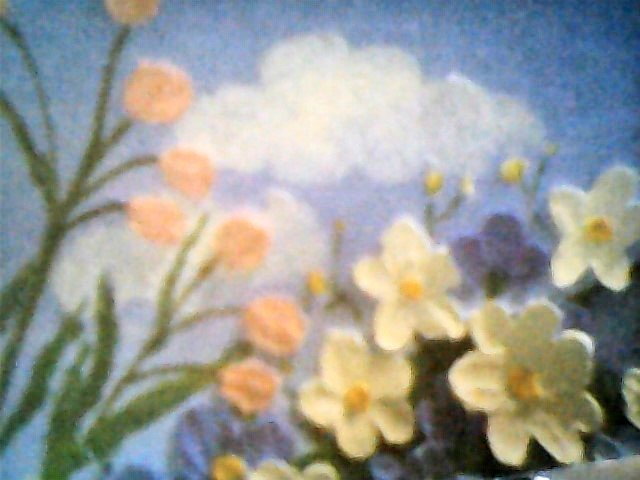

# Generate Caption

In [5]:
outputs=model.generate(**inputs)
caption=processr.decode(outputs[0],skip_special_tokens=True)
print('Generated Caption:',caption)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a painting of flowers in a vase


# I will use another photo to do the conditional image caption

In [6]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# Conditional image caption

In [7]:
text = "a photography of"
inputs = processr(raw_image, text, return_tensors="pt")

In [ ]:
out = model.generate(**inputs)
print(processr.decode(out[0], skip_special_tokens=True))

# Unconditional image caption

In [ ]:
inputs = processr(raw_image, return_tensors="pt")
out = model.generate(**inputs)
print(processr.decode(out[0], skip_special_tokens=True))

# Create a Web interface using Gradio

In [ ]:
pip install gradio

In [ ]:
def generate_caption(image):
  inputs = processr(images=image, return_tensors="pt")
  outputs = model.generate(**inputs)
  caption = processr.decode(outputs[0], skip_special_tokens=True)
  return caption

In [ ]:
def caption_image(image):
  try:
    caption = generate_caption(image)
    return caption
  except Exception as e:
    return f"An error occurred: {str(e)}"

In [ ]:
processr = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
iface = gr.Interface(
    fn=caption_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Image Captioning with BLIP",
    description="Upload an Image to generate a caption",
)

In [ ]:
iface.launch()